# クロマグラムを書いてみる

import

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

## ピアノのドレミファソラシド

In [11]:
wav, sr = librosa.load('./../data/piano_doremi.mp3', sr=None)

In [12]:
IPython.display.display(IPython.display.Audio(wav, rate=sr))

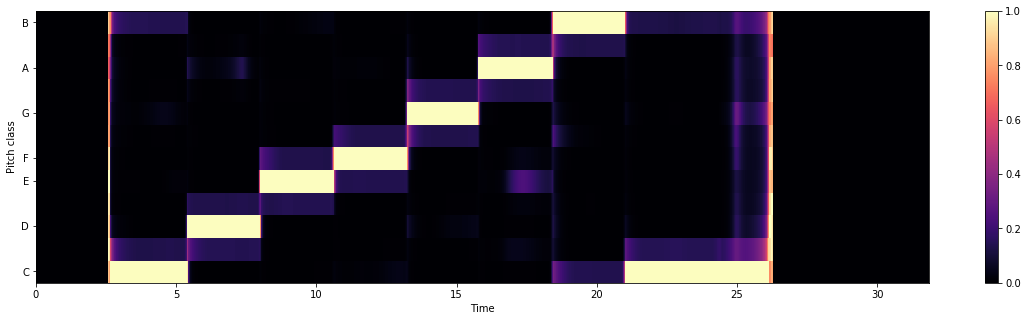

In [13]:
chroma = librosa.feature.chroma_stft(y=wav, sr=sr, n_fft=22050)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()

## ベースのドレミファソラシド

In [14]:
wav, sr = librosa.load('./../data/base_doremi.mp3', sr=None)

In [15]:
IPython.display.display(IPython.display.Audio(wav, rate=sr))

---> オクターブを変えていますが、クロマグラムはどうなるでしょうか。

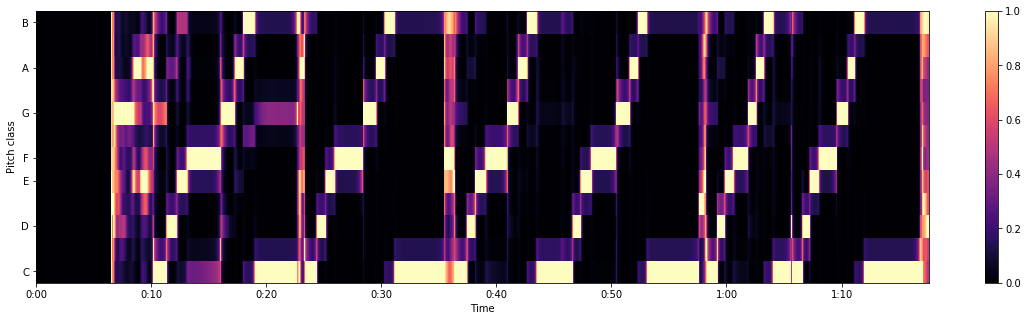

In [16]:
chroma = librosa.feature.chroma_stft(y=wav, sr=sr, n_fft=22050)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()

In [177]:
wav, sr = librosa.load('./../data/piano1_1do.wav', sr=None)

In [178]:
N = int(sr/2)
dt = 1/sr
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(wav[:N])
amp = np.abs(F)
amp

array([12.05126953,  3.26411021,  1.65937982, ...,  2.94339607,
        1.65937982,  3.26411021])

Text(0, 0.5, 'Intensity')

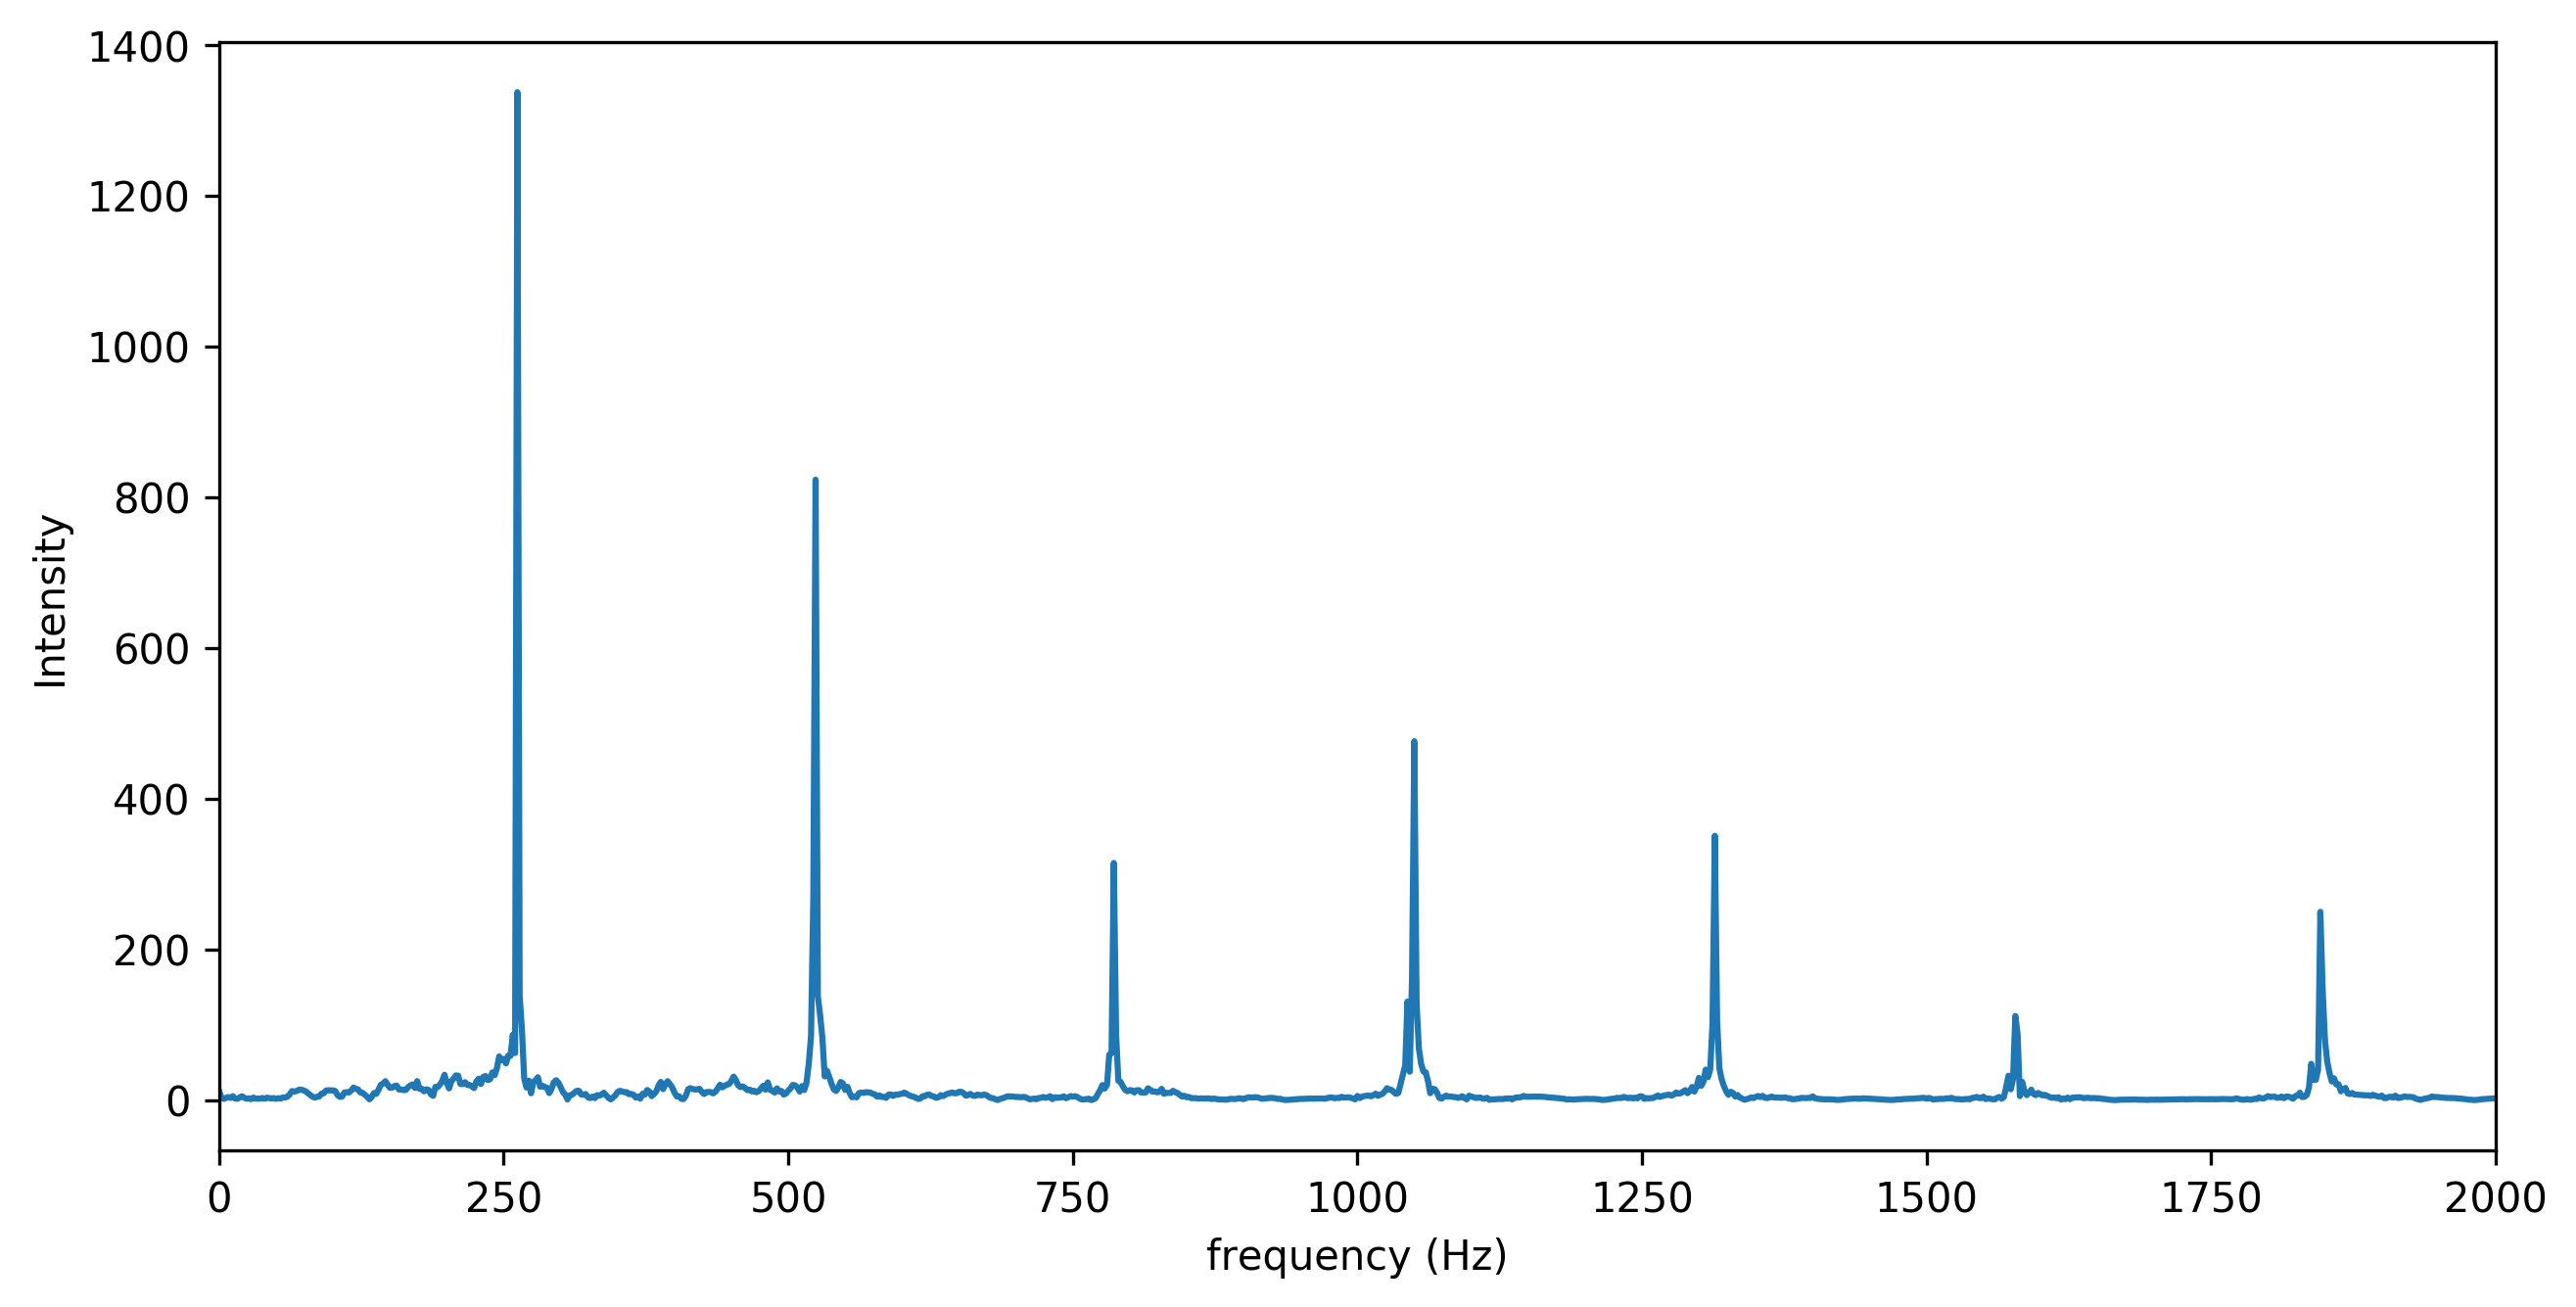

In [181]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(freq[:int(N/2)], amp[:int(N/2)])
plt.xlim(0, 2000)
plt.xlabel('frequency (Hz)')
plt.ylabel('Intensity')

In [124]:
filename = librosa.util.example_audio_file()
wav, sr = librosa.load(filename, sr=None)

In [125]:
N = int(sr/2)
dt = 1/sr
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(wav[:N])
amp = np.abs(F)
amp

array([13.27927994,  8.39834509,  6.16756847, ...,  2.70023224,
        6.16756847,  8.39834509])

Text(0, 0.5, 'Intensity')

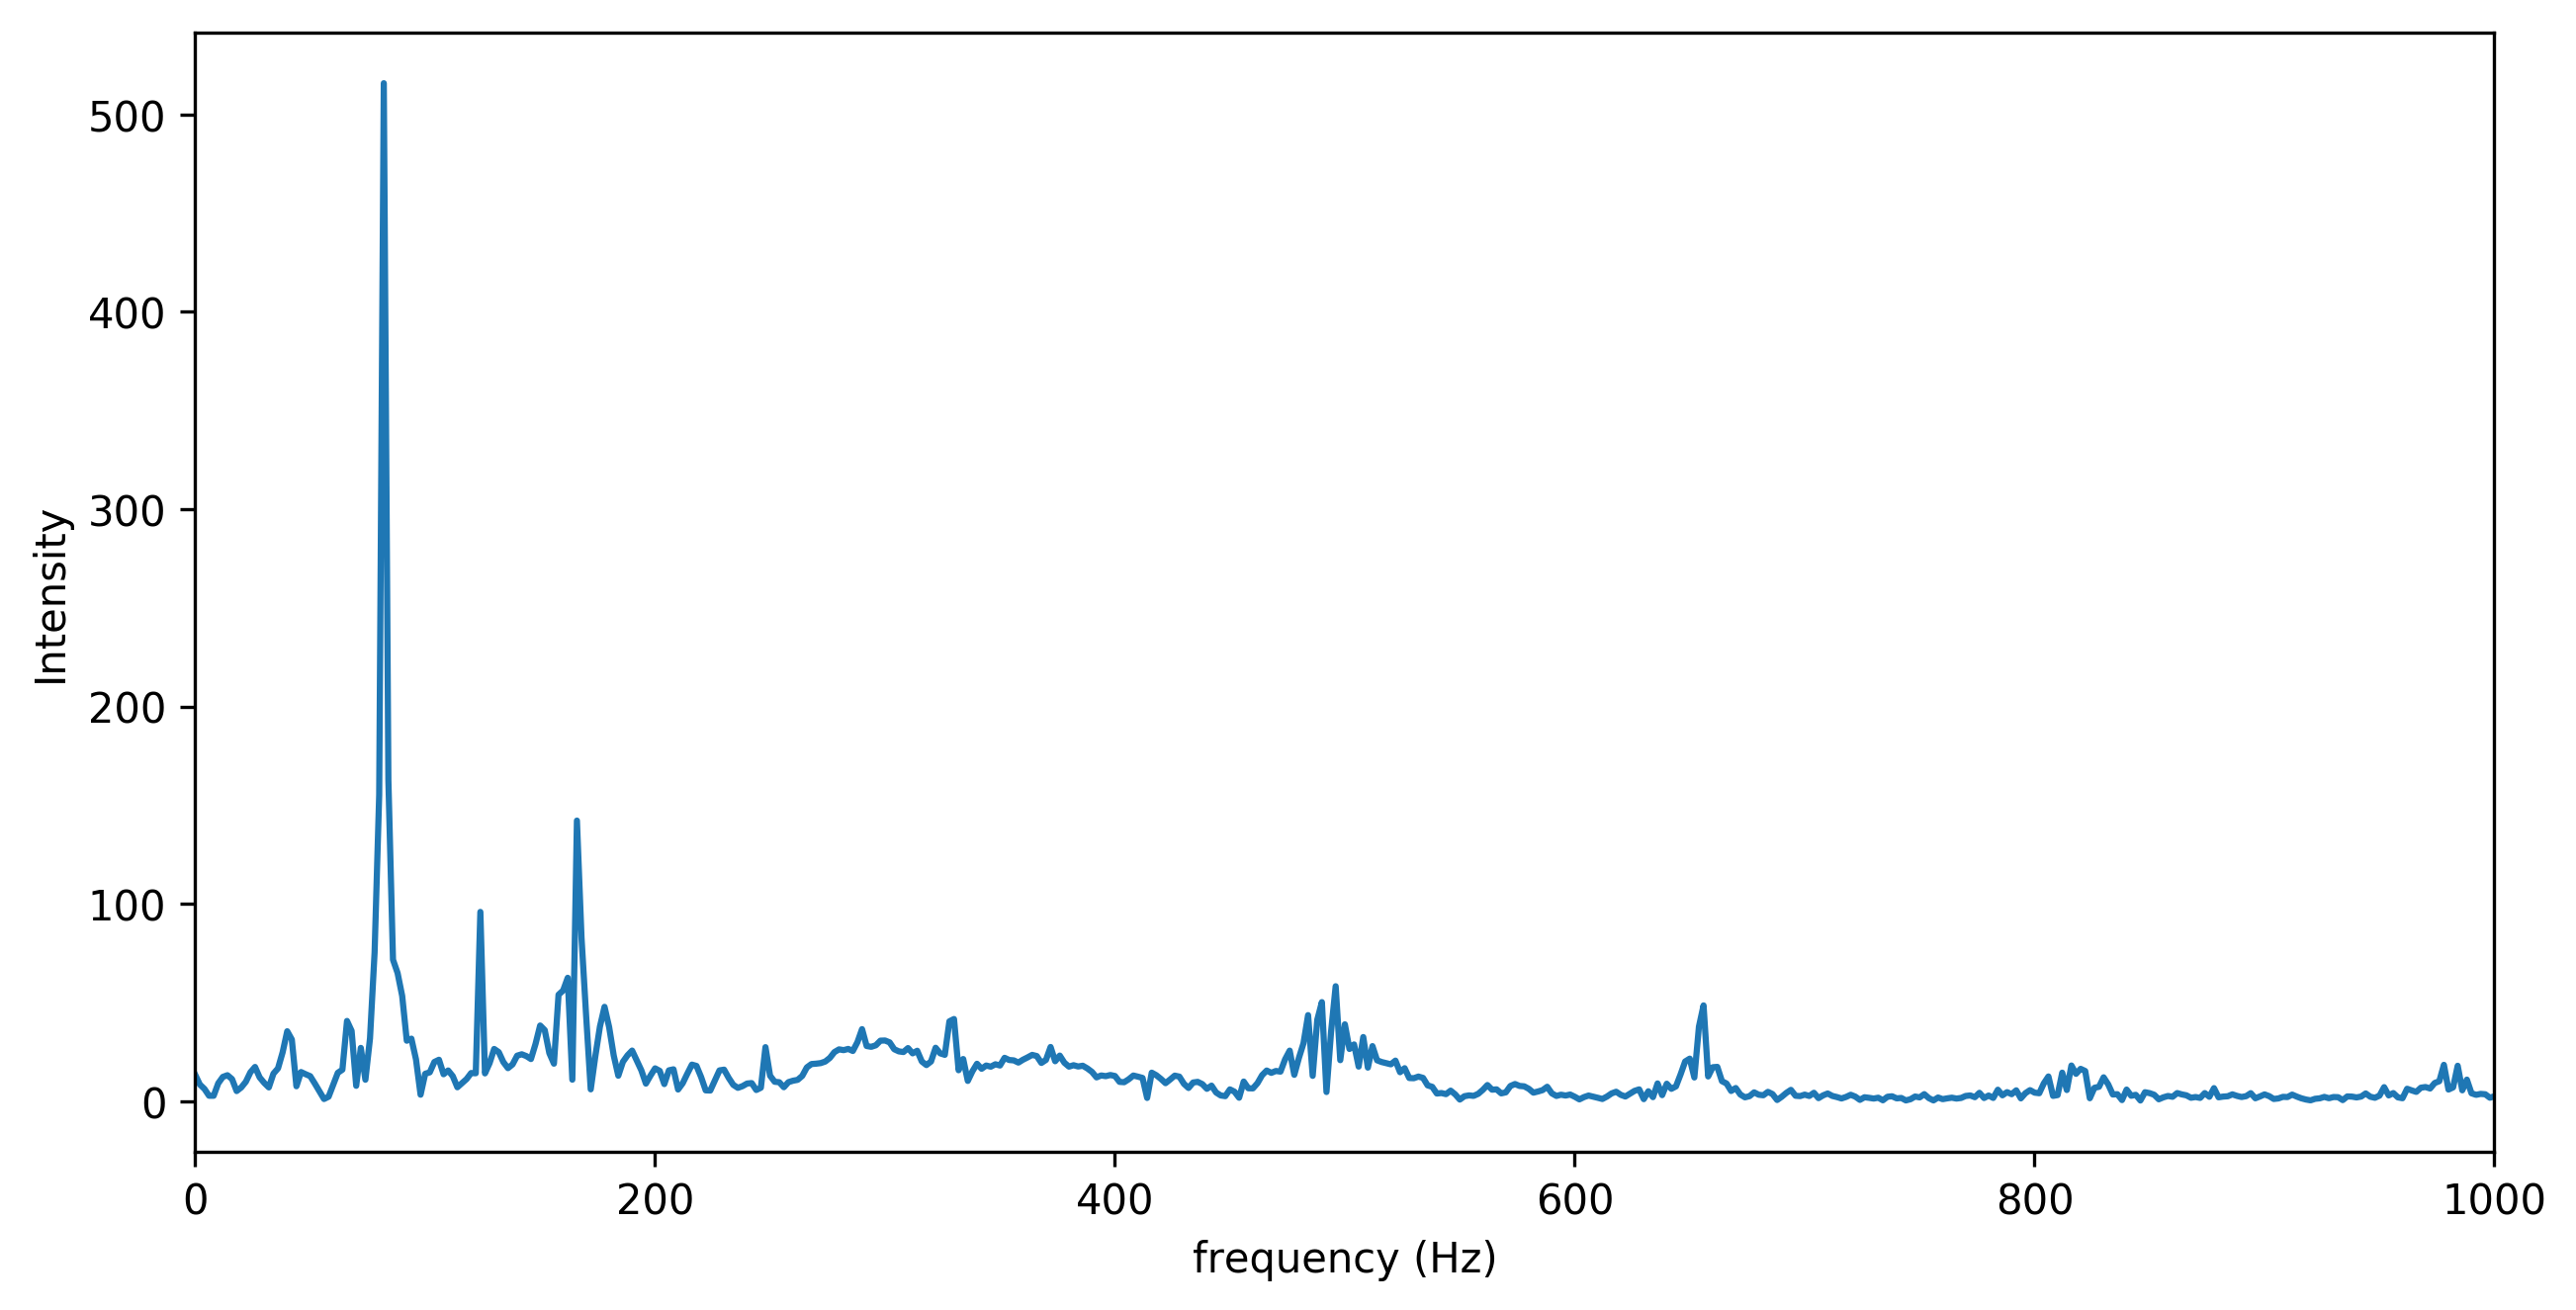

In [130]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(freq[:int(N/2)], amp[:int(N/2)])
plt.xlim(0, 1000)
plt.xlabel('frequency (Hz)')
plt.ylabel('Intensity')

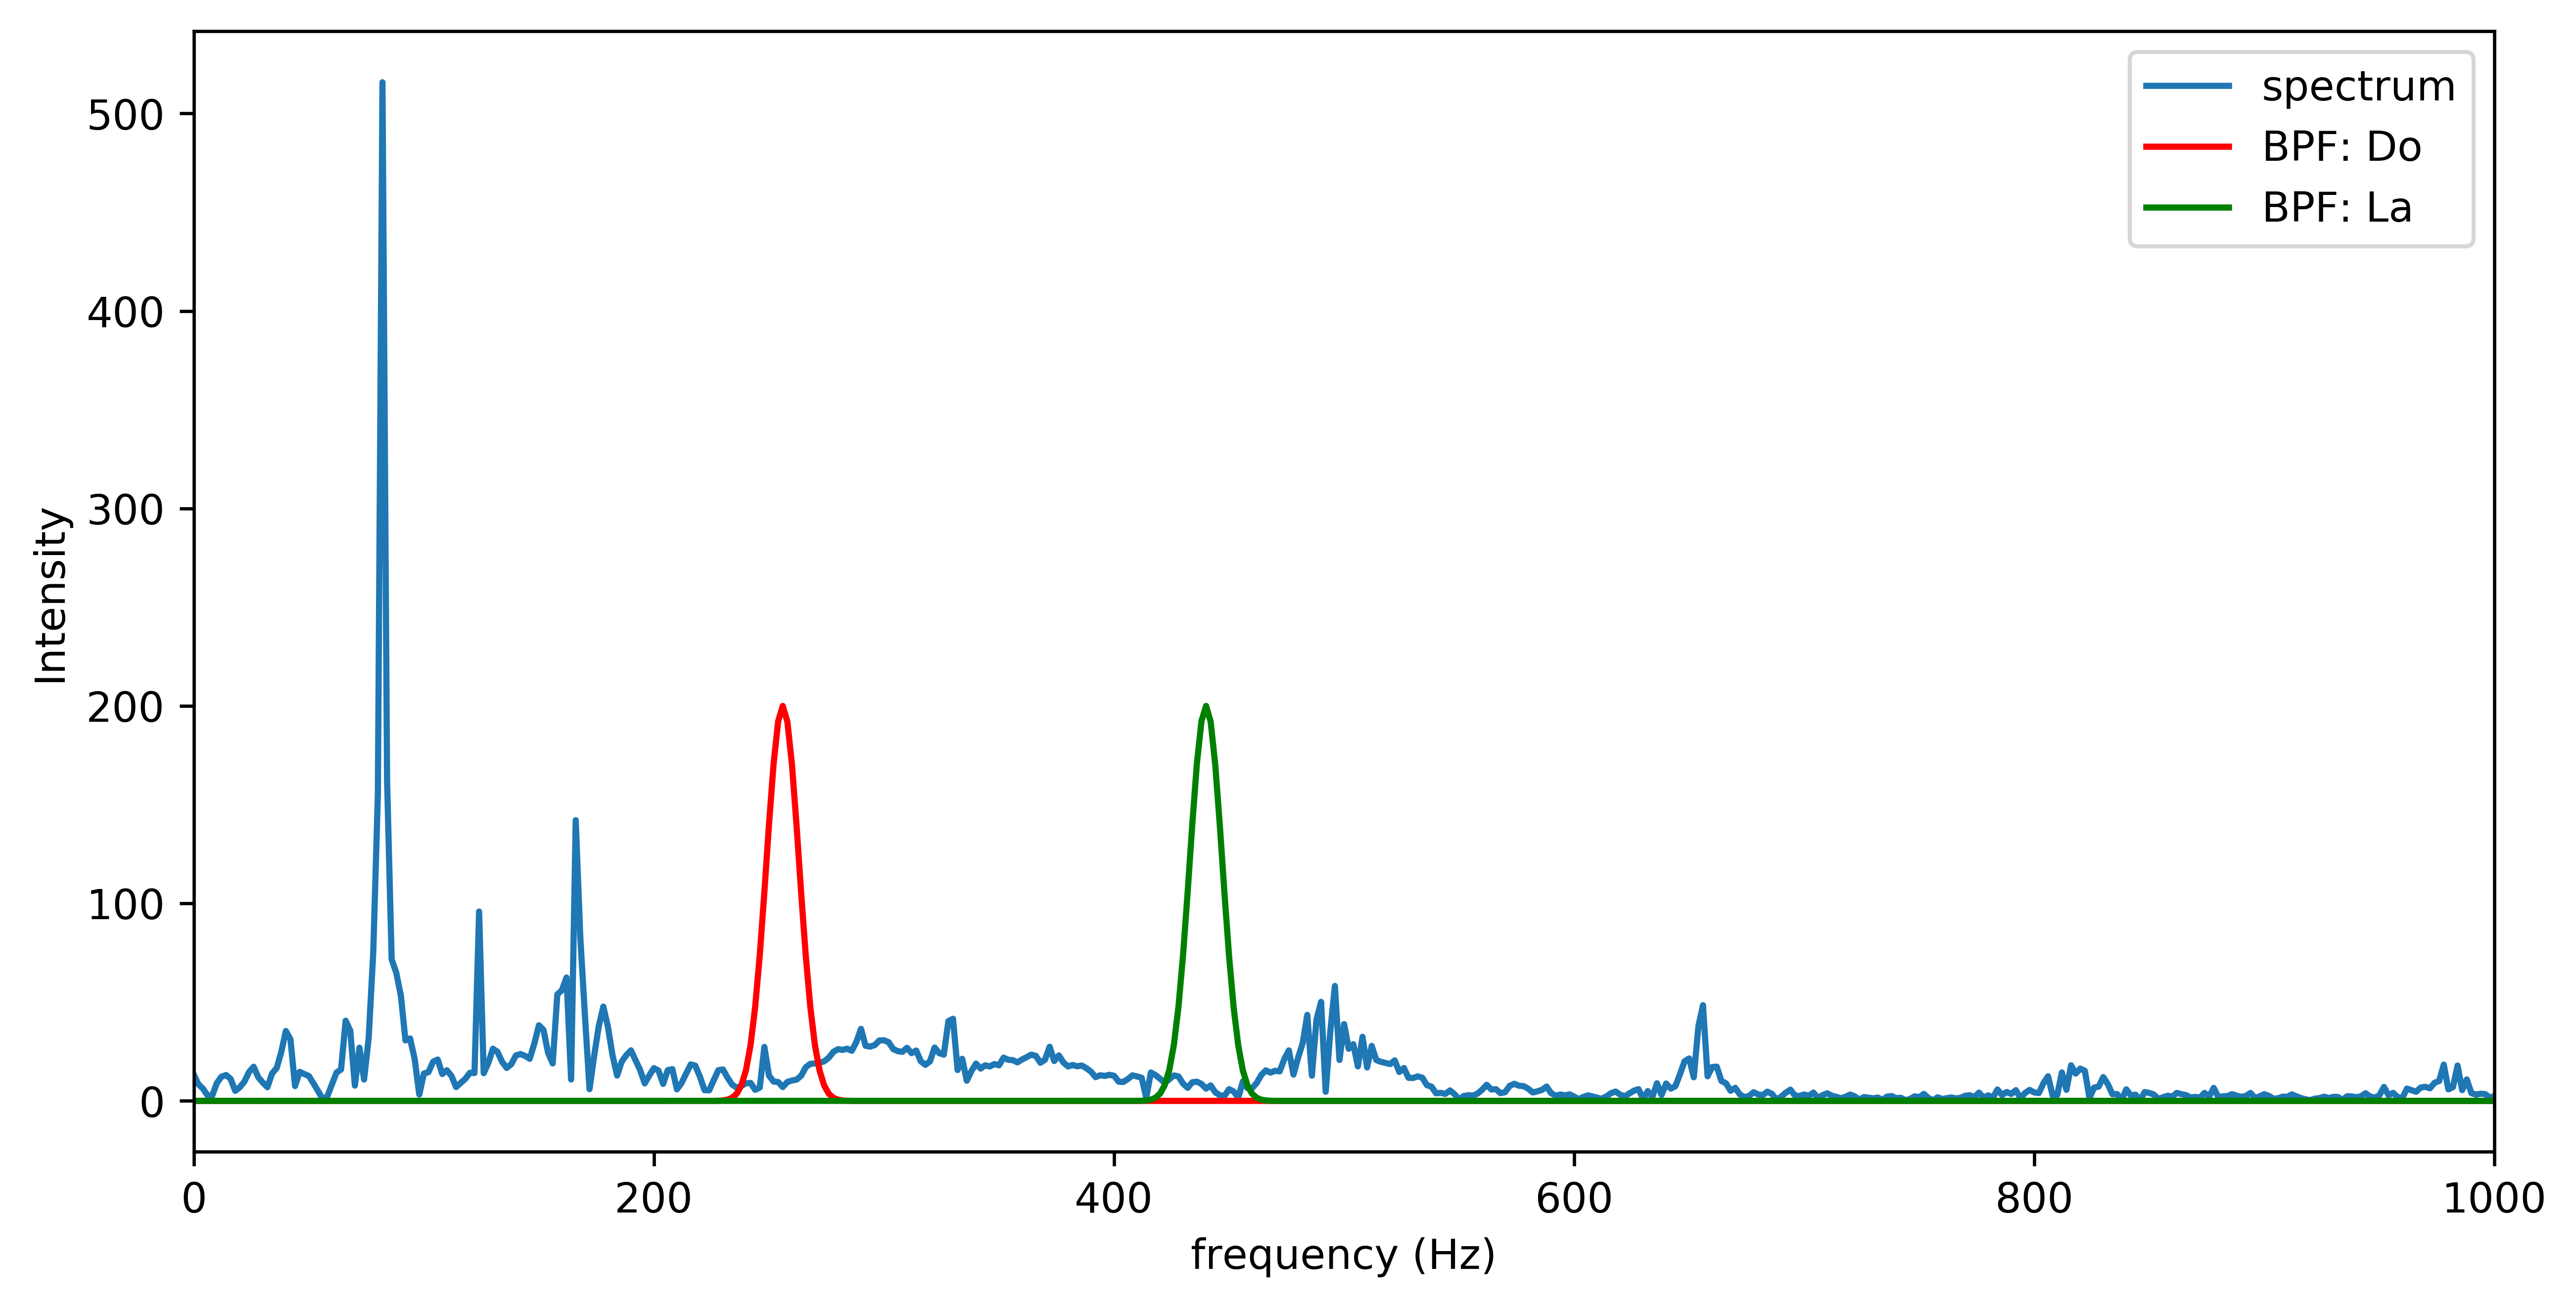

In [145]:
y_do = 200*np.exp(-(freq-256)**2 *0.01)
y_la = 200*np.exp(-(freq-440)**2 *0.01)

plt.figure(figsize=(10, 5), dpi=600)
plt.plot(freq[:int(N/2)], amp[:int(N/2)], label='spectrum')
plt.plot(freq[:int(N/2)], y_do[:int(N/2)], color='r', label='BPF: Do')
plt.plot(freq[:int(N/2)], y_la[:int(N/2)], color='green', label='BPF: La')
plt.xlim(0, 1000)
plt.xlabel('frequency (Hz)')
plt.ylabel('Intensity')
plt.legend()

In [ ]:
y_la = 200*np.exp(-(freq-440)**2 *0.01)

In [174]:
las = []
la = 55
for i in range(1, 6):
    las.append(la)
    la = la*2
las

[55, 110, 220, 440, 880]

In [175]:
y_la = np.zeros(len(freq))
for la in las:
    y_la += 200*np.exp(-(freq-la)**2 *0.01)

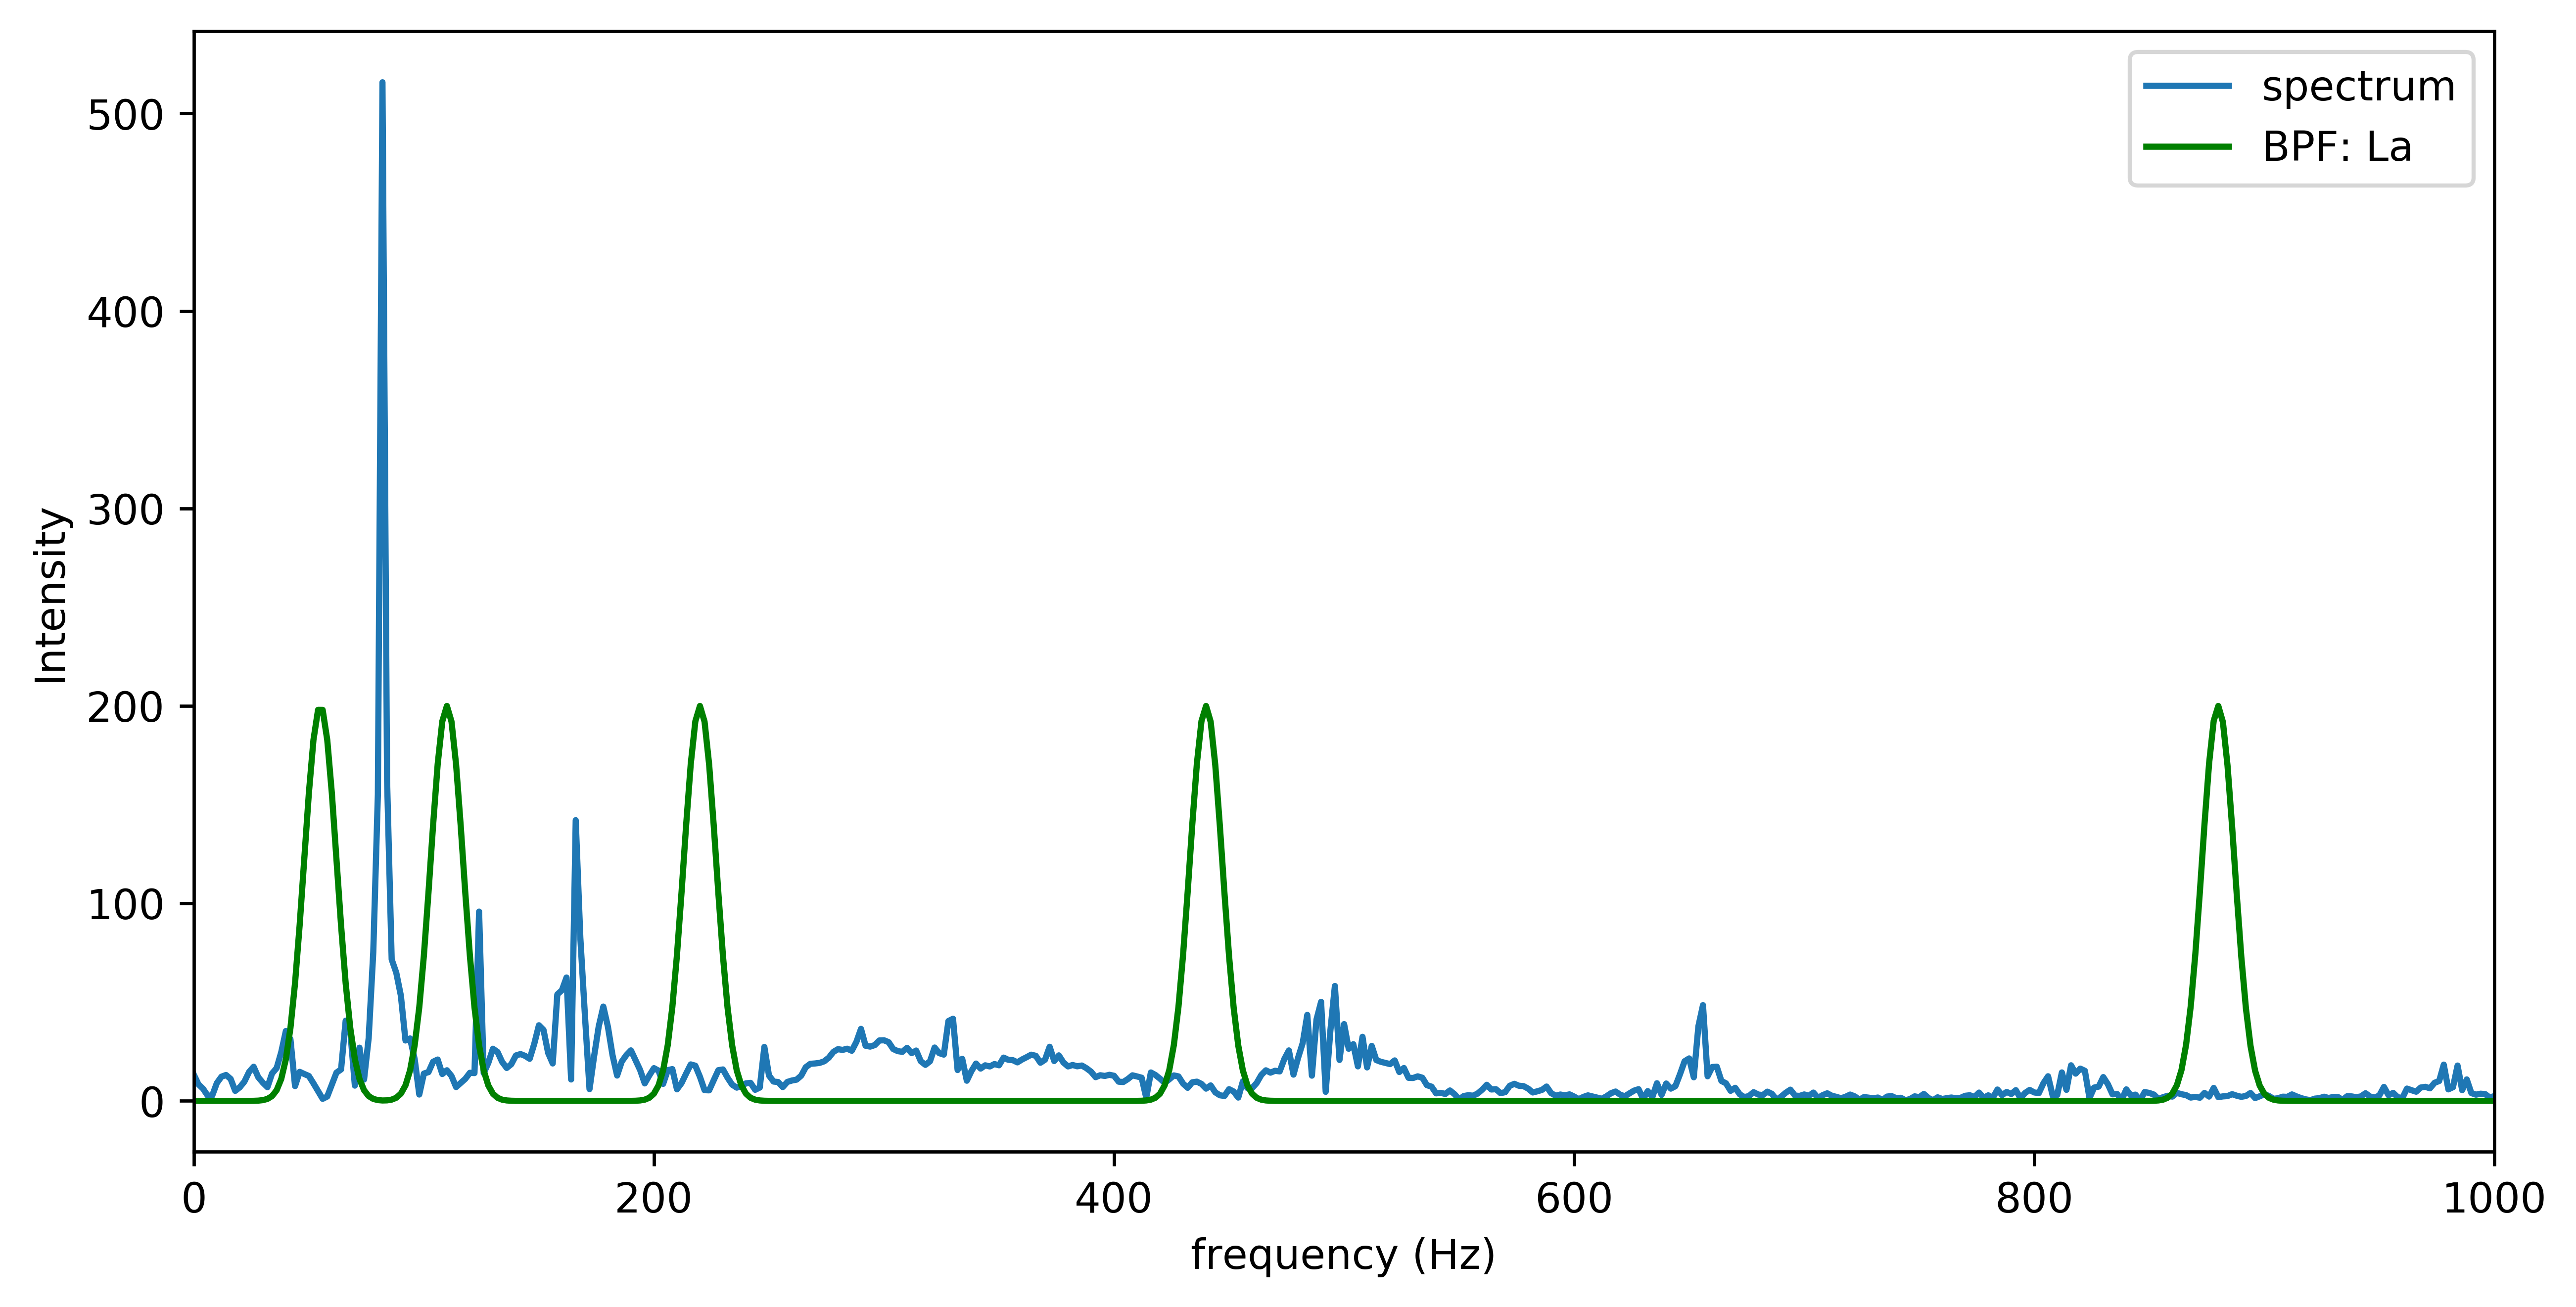

In [176]:
plt.figure(figsize=(10, 5), dpi=600)
plt.plot(freq[:int(N/2)], amp[:int(N/2)], label='spectrum')
plt.plot(freq[:int(N/2)], y_la[:int(N/2)], color='green', label='BPF: La')
plt.xlim(0, 1000)
plt.xlabel('frequency (Hz)')
plt.ylabel('Intensity')
plt.legend()